In [18]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
from citipy import citipy

In [20]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [21]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [22]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

45.871510434165515 -107.92332380743501
-33.93985634477891 119.99560796115782
-17.091448787814684 127.10465221161121
-69.68657227381712 -76.2475987587128
74.04228158202264 -54.00379226911227
11.32417937544868 0.1669950865735359
25.600645671056725 -13.210782497092623
-78.11374952297345 -137.8040119677973
-80.25423134030686 113.52738856095499
24.633489879981326 -48.01965271033913
66.15730769588737 -132.48017460935665
69.97902106079391 -52.800721630650855
55.44746145882738 87.18352323833045
51.954588413245375 163.5331790336125
-50.16466260227553 152.22423635378158
-34.87438218827474 128.59778204611416
18.285564967354105 89.02993600094857
13.45160676581962 59.65794495539484
-88.31113719091016 156.32486622764787
41.7141651248015 91.62084637340189
-79.15049905795834 -19.464505975096955
-17.835054810442585 101.70523183210628
-52.93580765675021 110.33782468457872
28.926317723078455 133.13064310989438
-11.814880155861218 -77.47293279670542
48.353469937989814 137.88664184645597
-33.03879562722585

-70.75686727417465 -145.70857214765164
-84.05034786230289 -66.03239888823805
18.149547671702123 152.24222365136296
6.581838124061065 134.90805574906102
73.53447656510195 178.02812614127913
73.67812766687504 -150.87409988559543
48.389129132330794 -71.4149080400889
53.274088011515175 87.94939401641648
17.697830562140837 -129.08410197401952
-70.30713505940032 -4.5561110019979765
24.34302284879027 97.40190145202405
80.92248499959732 126.12063983525917
-43.39414754682637 -27.53550077094968
-21.61106756659217 19.4222647528334
-3.4013865547451303 -159.32880419354706
-25.563151756782986 63.625810034030195
31.790963887917528 96.57963237033232
34.181353539669445 166.4827836446466
30.119042291033665 99.81638717007365
-65.22494362639915 -163.44529279103216
59.244925788836156 35.35600078418324
-40.144303564038225 -174.20279010534063
55.231150074140345 84.57588907388595
65.45890907513962 -4.130044965122892
52.742382655496215 83.01376002947916
46.532047401318295 -109.06131941297052
5.67145108992689 1

In [23]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)
print(cities)

['billings', 'esperance', 'kununurra', 'ushuaia', 'upernavik', 'ouargaye', 'puerto del rosario', 'rikitea', 'albany', 'codrington', 'inuvik', 'aasiaat', 'zelenogorskiy', 'nikolskoye', 'hobart', 'flinders', 'paradwip', 'salalah', 'bluff', 'hami', 'palabuhanratu', 'kushima', 'chancay', 'troitskoye', 'val', 'surab', 'barrow', 'halden', 'klaksvik', 'arraial do cabo', 'richards bay', 'lorengau', 'airai', 'altay', 'liusha', 'castro', 'arlit', 'roma', 'tuktoyaktuk', 'port lincoln', 'kasongo', 'mataura', 'avarua', 'kodiak', 'saleaula', 'alta floresta', 'caravelas', 'tual', 'taolanaro', 'chuy', 'busselton', 'hambantota', 'new norfolk', 'mount isa', 'ludvika', 'yellowknife', 'kindu', 'olinda', 'cape town', 'homer', 'hofn', 'vitimskiy', 'tomatlan', 'komsomolskiy', 'valparaiso', 'kargil', 'mancio lima', 'adre', 'punta arenas', 'hermanus', 'acari', 'voh', 'vaini', 'georgetown', 'port elizabeth', 'pindobacu', 'mar del plata', 'bredasdorp', 'pundaguitan', 'kalmunai', 'quetame', 'sitka', 'saldanha', '

In [24]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [25]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [26]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | billings
Processing Record 2 of Set 1 | esperance
Processing Record 3 of Set 1 | kununurra
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | upernavik
Processing Record 6 of Set 1 | ouargaye
Processing Record 7 of Set 1 | puerto del rosario
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | codrington
Processing Record 11 of Set 1 | inuvik
Processing Record 12 of Set 1 | aasiaat
Processing Record 13 of Set 1 | zelenogorskiy
Processing Record 14 of Set 1 | nikolskoye
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | flinders
Processing Record 17 of Set 1 | paradwip
City not found. Skipping...
Processing Record 18 of Set 1 | salalah
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | hami
Processing Record 21 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 22 of Set 1 | kushima
Processing Record 23 of Set 1 | chancay
Pr

Processing Record 41 of Set 4 | lata
Processing Record 42 of Set 4 | khatanga
Processing Record 43 of Set 4 | maghama
City not found. Skipping...
Processing Record 44 of Set 4 | la palma
Processing Record 45 of Set 4 | qasigiannguit
Processing Record 46 of Set 4 | dingle
Processing Record 47 of Set 4 | klungkung
Processing Record 48 of Set 4 | qiongshan
Processing Record 49 of Set 4 | virginia beach
Processing Record 50 of Set 4 | vila velha
Processing Record 1 of Set 5 | buala
Processing Record 2 of Set 5 | katsuura
Processing Record 3 of Set 5 | lagoa
Processing Record 4 of Set 5 | kapaa
Processing Record 5 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 6 of Set 5 | yar-sale
Processing Record 7 of Set 5 | garh maharaja
Processing Record 8 of Set 5 | mauswagon
City not found. Skipping...
Processing Record 9 of Set 5 | nuuk
Processing Record 10 of Set 5 | colares
Processing Record 11 of Set 5 | saint-pierre
Processing Record 12 of Set 5 | saint george
Processing R

Processing Record 32 of Set 8 | kawalu
Processing Record 33 of Set 8 | umuahia
Processing Record 34 of Set 8 | santa cruz
Processing Record 35 of Set 8 | abaza
Processing Record 36 of Set 8 | kirkwood
Processing Record 37 of Set 8 | naze
Processing Record 38 of Set 8 | yulara
Processing Record 39 of Set 8 | dedougou
Processing Record 40 of Set 8 | vitoria da conquista
Processing Record 41 of Set 8 | baykit
Processing Record 42 of Set 8 | ternate
Processing Record 43 of Set 8 | mahaicony
City not found. Skipping...
Processing Record 44 of Set 8 | rio gallegos
Processing Record 45 of Set 8 | tashla
Processing Record 46 of Set 8 | grindavik
Processing Record 47 of Set 8 | iqaluit
Processing Record 48 of Set 8 | necochea
Processing Record 49 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 50 of Set 8 | grand forks
Processing Record 1 of Set 9 | andapa
Processing Record 2 of Set 9 | dublin
Processing Record 3 of Set 9 | port hardy
Processing Record 4 of Set 9 | tashtyp
P

Processing Record 17 of Set 12 | kungurtug
Processing Record 18 of Set 12 | arkhara
Processing Record 19 of Set 12 | boquira
Processing Record 20 of Set 12 | cape canaveral
Processing Record 21 of Set 12 | cockburn town
Processing Record 22 of Set 12 | ranong
Processing Record 23 of Set 12 | kyra
Processing Record 24 of Set 12 | ponta delgada
Processing Record 25 of Set 12 | guthrie
Processing Record 26 of Set 12 | mandalgovi
Processing Record 27 of Set 12 | mombetsu
Processing Record 28 of Set 12 | hendek
Processing Record 29 of Set 12 | algiers
Processing Record 30 of Set 12 | bocaiuva
Processing Record 31 of Set 12 | ilulissat
Processing Record 32 of Set 12 | tsogni
Processing Record 33 of Set 12 | honiara
Processing Record 34 of Set 12 | oakland
Processing Record 35 of Set 12 | muslyumovo
Processing Record 36 of Set 12 | ambulu
Processing Record 37 of Set 12 | mizdah
Processing Record 38 of Set 12 | koppies
Processing Record 39 of Set 12 | araguatins
City not found. Skipping...
Pro

In [28]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Billings,45.7833,-108.5007,62.29,27,75,3.44,US,2022-05-23 18:15:35
1,Esperance,-33.8667,121.9000,58.84,66,64,26.46,AU,2022-05-23 18:19:06
2,Kununurra,-15.7667,128.7333,62.58,82,39,0.00,AU,2022-05-23 18:19:07
3,Ushuaia,-54.8000,-68.3000,38.82,69,40,4.61,AR,2022-05-23 18:15:32
4,Upernavik,72.7868,-56.1549,30.83,93,100,1.70,GL,2022-05-23 18:19:07
...,...,...,...,...,...,...,...,...,...
587,Pingliang,35.5392,106.6861,59.43,73,10,2.30,CN,2022-05-23 18:36:37
588,Magadan,59.5667,150.8000,33.53,97,100,2.17,RU,2022-05-23 18:36:33
589,Antalaha,-14.9003,50.2788,69.67,82,24,6.89,MG,2022-05-23 18:36:37
590,Zhuanghe,39.7008,122.9911,57.54,91,2,3.02,CN,2022-05-23 18:36:38


In [29]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [32]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Billings,US,2022-05-23 18:15:35,45.7833,-108.5007,62.29,27,75,3.44
1,Esperance,AU,2022-05-23 18:19:06,-33.8667,121.9000,58.84,66,64,26.46
2,Kununurra,AU,2022-05-23 18:19:07,-15.7667,128.7333,62.58,82,39,0.00
3,Ushuaia,AR,2022-05-23 18:15:32,-54.8000,-68.3000,38.82,69,40,4.61
4,Upernavik,GL,2022-05-23 18:19:07,72.7868,-56.1549,30.83,93,100,1.70
5,Ouargaye,BF,2022-05-23 18:19:08,11.5033,0.0572,79.88,60,99,4.61
6,Puerto Del Rosario,ES,2022-05-23 18:19:08,28.5004,-13.8627,71.35,73,75,19.57
7,Rikitea,PF,2022-05-23 18:17:31,-23.1203,-134.9692,75.94,75,29,13.53
8,Albany,US,2022-05-23 18:19:10,42.6001,-73.9662,67.59,45,98,1.01
9,Codrington,AU,2022-05-23 18:19:11,-38.2667,141.9667,49.10,85,4,6.69


In [34]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [35]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

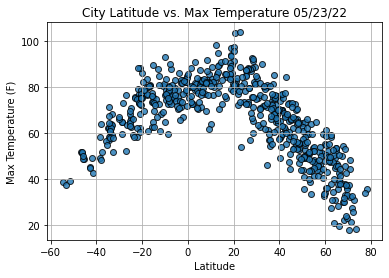

In [36]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()



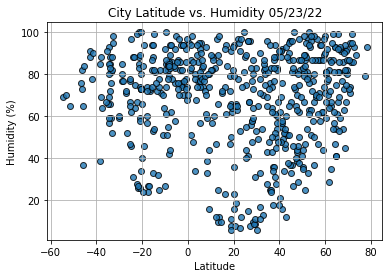

In [37]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

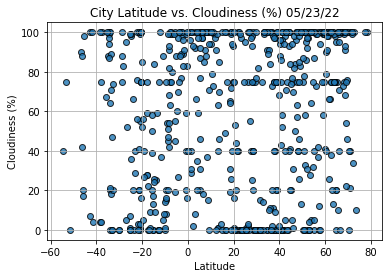

In [38]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

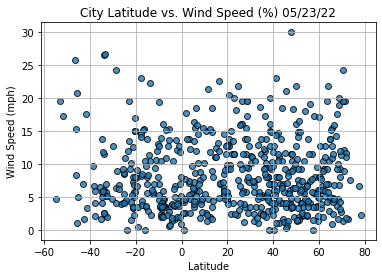

In [39]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (%) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [95]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
 
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
       # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [57]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Billings,US,2022-05-23 18:15:35,45.7833,-108.5007,62.29,27,75,3.44
4,Upernavik,GL,2022-05-23 18:19:07,72.7868,-56.1549,30.83,93,100,1.70
5,Ouargaye,BF,2022-05-23 18:19:08,11.5033,0.0572,79.88,60,99,4.61
6,Puerto Del Rosario,ES,2022-05-23 18:19:08,28.5004,-13.8627,71.35,73,75,19.57
8,Albany,US,2022-05-23 18:19:10,42.6001,-73.9662,67.59,45,98,1.01


In [58]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

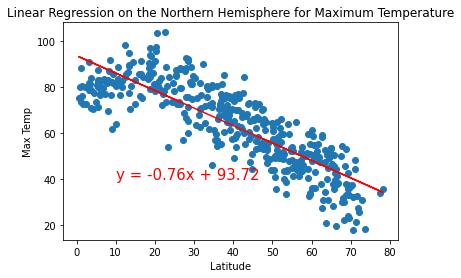

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

tuple:  0.677993977617276 83.41950373832046 0.7815663709113246 2.5260649228547673e-38 0.04056119340347548
regress_values  1      60.458085
2      72.729776
3      46.265434
7      67.744080
9      57.474912
         ...    
566    77.886124
567    83.270209
570    80.673628
580    73.746767
589    73.317190
Name: Lat, Length: 180, dtype: float64
line_eq:  y = 0.68x + 83.42


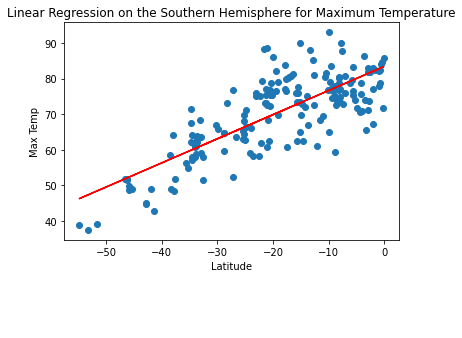

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,10))

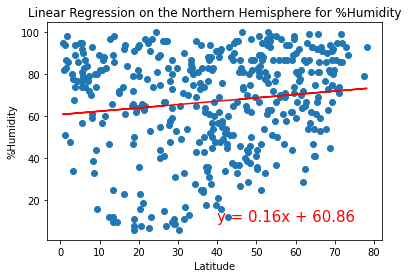

In [71]:
# Linear regression on the Northen Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for %Humidity', '%Humidity',(40,10))

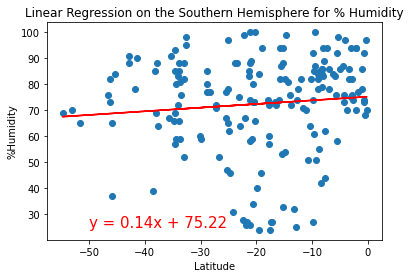

In [96]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '%Humidity',(-50,25))

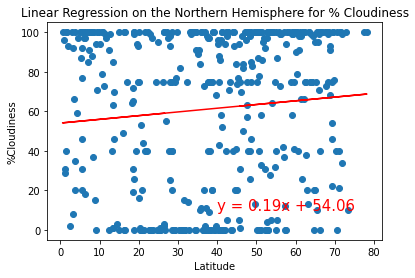

In [97]:
# Linear regression on the Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values,y_values,"Linear Regression on the Northern Hemisphere for % Cloudiness" ,"%Cloudiness",(40,10))


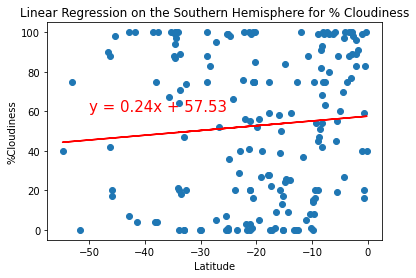

In [98]:
## Linear regression on the Southern Hemisphere

x_values= southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values,y_values,"Linear Regression on the Southern Hemisphere for % Cloudiness" ,"%Cloudiness",(-50,60))


In [ ]:
# Linear regression on the Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values,y_values,"Linear Regression on the Northern Hemisphere for Wind Speed" ,"%Cloudiness",(40,10))
